Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 149.1469 - mean_absolute_error: 11.3108
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5088 - mean_absolute_error: 1.5247
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1251 - mean_absolute_error: 0.2963
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0365 - mean_absolute_error: 0.1489 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0315 - mean_absolute_error: 0.1583 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0419 - mean_absolute_error: 0.1689
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199 - mean_absolute_error: 0.1150
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0267 - mean_absolute_error: 0.1401
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0212 - mean_absolute_error: 0.1210   
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0255 - mean_absolute_error: 0.1411 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Be

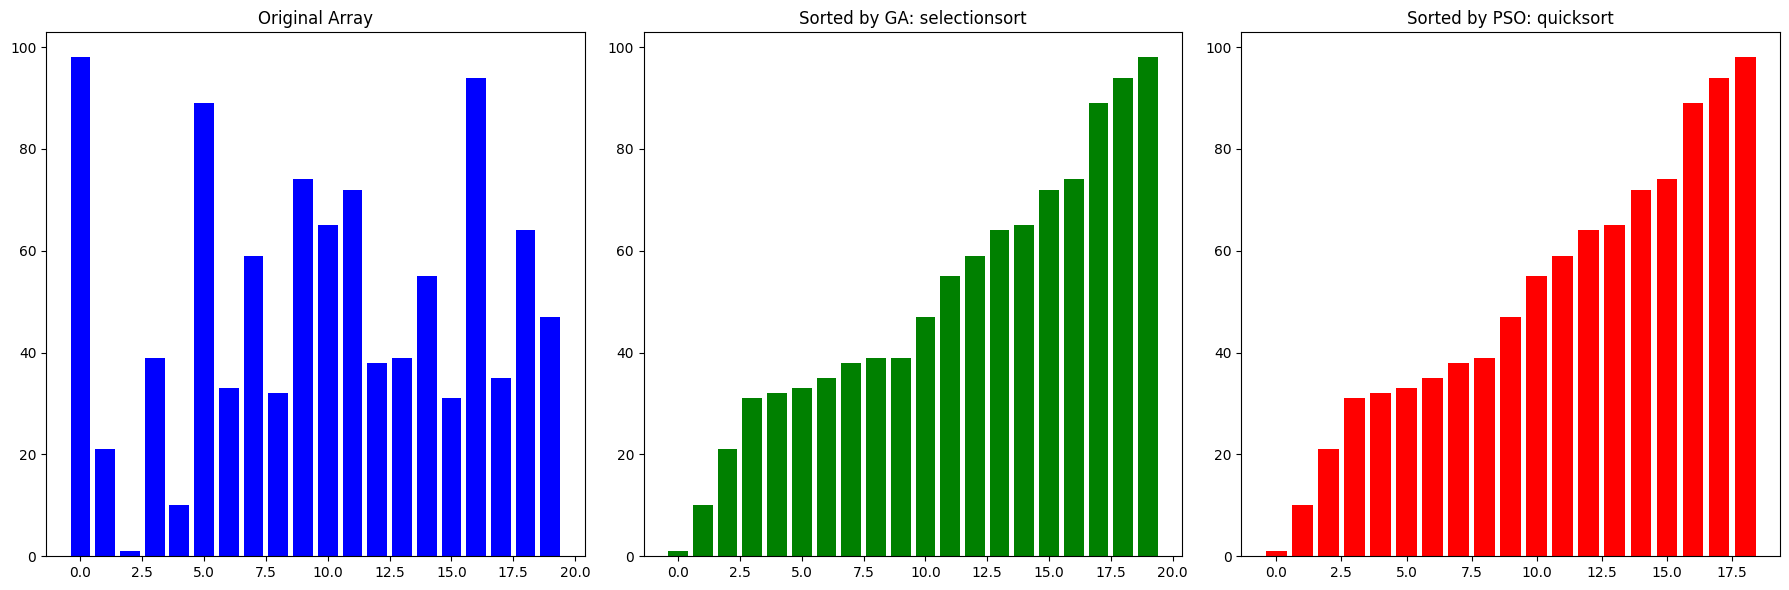

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import time

# Sorting Algorithms
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    left = [x for x in arr if x < pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + [pivot] + quicksort(right)

def mergesort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def bubblesort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selectionsort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Fitness function to evaluate sorting performance (time taken to sort)
def fitness_function(arr, sort_algorithm):
    start_time = time.time()
    sort_algorithm(arr.copy())
    end_time = time.time()
    return end_time - start_time  # Return the sorting time as fitness

# Genetic Algorithm (GA)
def genetic_algorithm(arr, population_size=10, generations=5):
    algorithms = [quicksort, mergesort, bubblesort, selectionsort]
    population = [random.choice(algorithms) for _ in range(population_size)]
    fitness_scores = []

    for generation in range(generations):
        # Evaluate fitness
        fitness_scores = [fitness_function(arr, algo) for algo in population]

        # Selection: Select the best half of the population
        selected_population = [population[i] for i in np.argsort(fitness_scores)[:population_size // 2]]

        # Crossover: Create new population by combining selected strategies
        new_population = selected_population.copy()
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(selected_population, 2)
            child = random.choice([parent1, parent2])  # Random crossover for simplicity
            new_population.append(child)

        population = new_population

    # Return the best algorithm
    best_algorithm = population[np.argmin(fitness_scores)]
    return best_algorithm

# Particle Swarm Optimization (PSO)
class PSO:
    def __init__(self, arr, num_particles=10, max_iter=10):
        self.arr = arr
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.algorithms = [quicksort, mergesort, bubblesort, selectionsort]
        self.particles = [random.choice(range(len(self.algorithms))) for _ in range(self.num_particles)]
        self.velocities = [random.uniform(-1, 1) for _ in range(self.num_particles)]
        self.best_positions = self.particles.copy()
        self.best_scores = [fitness_function(arr, self.algorithms[particle]) for particle in self.particles]
        self.global_best_position = self.particles[np.argmin(self.best_scores)]

    def update_particles(self):
        for i in range(self.num_particles):
            r1, r2 = random.random(), random.random()
            self.velocities[i] = 0.5 * self.velocities[i] + 2 * r1 * (self.best_positions[i] - self.particles[i]) + 2 * r2 * (self.global_best_position - self.particles[i])
            self.particles[i] = int(self.particles[i] + self.velocities[i]) % len(self.algorithms)  # Ensure valid index

    def optimize(self):
        for _ in range(self.max_iter):
            self.update_particles()
            for i in range(self.num_particles):
                score = fitness_function(self.arr, self.algorithms[self.particles[i]])
                if score < self.best_scores[i]:
                    self.best_positions[i] = self.particles[i]
                    self.best_scores[i] = score
            self.global_best_position = self.best_positions[np.argmin(self.best_scores)]
        return self.algorithms[self.global_best_position]

# Create a simple ANN model
def create_ann_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_dim=2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='linear')  # Regression output for sorting time prediction
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Example dataset features (for simplicity, using length and range of array)
def get_features(arr):
    return [len(arr), max(arr) - min(arr)]

# Train the ANN on example data (using sorting times as labels)
def train_ann(arrays):
    X = np.array([get_features(arr) for arr in arrays])
    y = np.array([fitness_function(arr, random.choice([quicksort, mergesort, bubblesort, selectionsort])) for arr in arrays])
    model = create_ann_model()
    model.fit(X, y, epochs=10, batch_size=2)
    return model

# Visualization of sorting process and performance
def plot_sorting_comparison(arr, best_algorithm_ga, best_algorithm_pso):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot original array
    axes[0].bar(range(len(arr)), arr, color='blue')
    axes[0].set_title("Original Array")

    # Plot sorted array from GA
    sorted_ga = best_algorithm_ga(arr.copy())
    axes[1].bar(range(len(sorted_ga)), sorted_ga, color='green')
    axes[1].set_title(f"Sorted by GA: {best_algorithm_ga.__name__}")

    # Plot sorted array from PSO
    sorted_pso = best_algorithm_pso(arr.copy())
    axes[2].bar(range(len(sorted_pso)), sorted_pso, color='red')
    axes[2].set_title(f"Sorted by PSO: {best_algorithm_pso.__name__}")

    plt.tight_layout()
    plt.show()

# Main Code Execution
arr = [random.randint(1, 100) for _ in range(20)]  # Example dataset

# Genetic Algorithm
best_algorithm_ga = genetic_algorithm(arr)

# Particle Swarm Optimization
pso = PSO(arr)
best_algorithm_pso = pso.optimize()

# Artificial Neural Network
arrays = [random.sample(range(1, 100), 20) for _ in range(50)]  # Generate random datasets
model = train_ann(arrays)
features = get_features(arr)
predicted_time = model.predict(np.array([features]))

# Calculate improvement percentages
original_time = fitness_function(arr, random.choice([quicksort, mergesort, bubblesort, selectionsort]))
ga_time = fitness_function(arr, best_algorithm_ga)
pso_time = fitness_function(arr, best_algorithm_pso)

improvement_ga = ((original_time - ga_time) / original_time) * 100
improvement_pso = ((original_time - pso_time) / original_time) * 100

# Print results
print(f"Best Sorting Algorithm from GA: {best_algorithm_ga.__name__}")
print(f"Best Sorting Algorithm from PSO: {best_algorithm_pso.__name__}")
print(f"Predicted Sorting Time from ANN: {predicted_time[0][0]}")
print(f"Improvement from GA: {improvement_ga:.2f}%")
print(f"Improvement from PSO: {improvement_pso:.2f}%")

# Visualization
plot_sorting_comparison(arr, best_algorithm_ga, best_algorithm_pso)
